First 5 samples of original data:
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]

First 5 samples after Min-Max Normalization:
[[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]

First 5 samples after Z-score Standardization:
[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


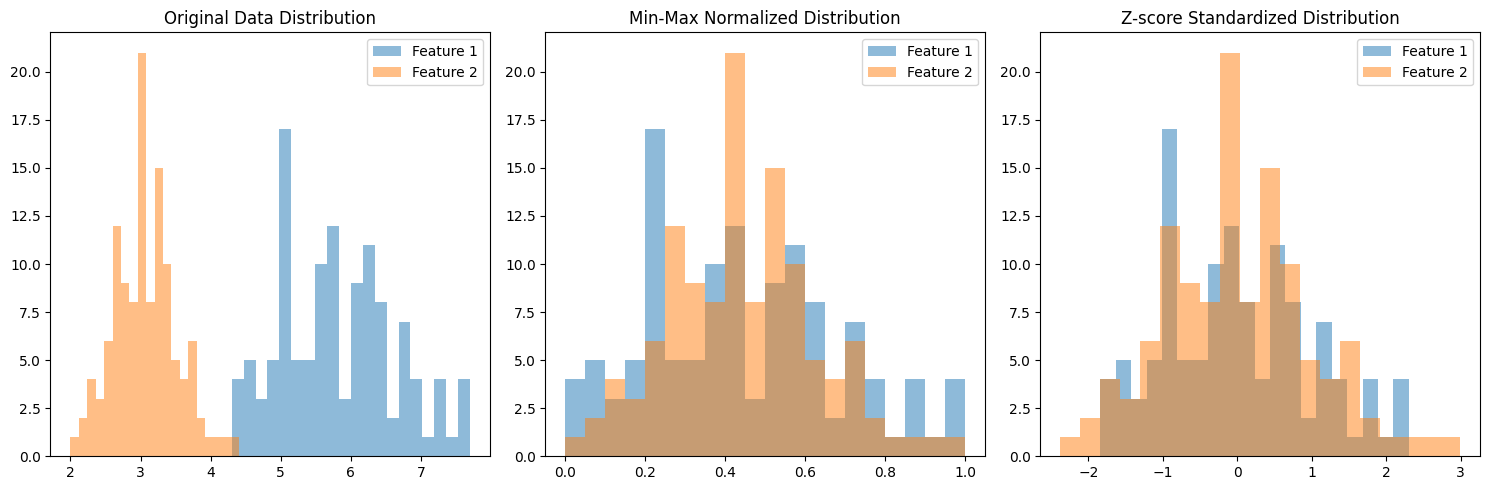


Model Performance Comparison:
Original Data Accuracy: 1.0000
Min-Max Normalized Accuracy: 0.9667
Z-score Standardized Accuracy: 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data before preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Original data (no preprocessing)
print("First 5 samples of original data:")
print(X_train[:5])

# 2. Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
print("\nFirst 5 samples after Min-Max Normalization:")
print(X_train_minmax[:5])

# 3. Z-score Standardization
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
print("\nFirst 5 samples after Z-score Standardization:")
print(X_train_std[:5])

# Visualization
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.hist(X_train[:, 0], bins=20, alpha=0.5, label='Feature 1')
plt.hist(X_train[:, 1], bins=20, alpha=0.5, label='Feature 2')
plt.title('Original Data Distribution')
plt.legend()

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(X_train_minmax[:, 0], bins=20, alpha=0.5, label='Feature 1')
plt.hist(X_train_minmax[:, 1], bins=20, alpha=0.5, label='Feature 2')
plt.title('Min-Max Normalized Distribution')
plt.legend()

# Z-score Standardized
plt.subplot(1, 3, 3)
plt.hist(X_train_std[:, 0], bins=20, alpha=0.5, label='Feature 1')
plt.hist(X_train_std[:, 1], bins=20, alpha=0.5, label='Feature 2')
plt.title('Z-score Standardized Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Model training and evaluation
def train_evaluate(X_train, X_test, y_train, y_test, name):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

print("\nModel Performance Comparison:")
train_evaluate(X_train, X_test, y_train, y_test, "Original Data")
train_evaluate(X_train_minmax, X_test_minmax, y_train, y_test, "Min-Max Normalized")
train_evaluate(X_train_std, X_test_std, y_train, y_test, "Z-score Standardized")